# Import Libraries

In [61]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import tensorflow as tf

# Load Images

In [62]:
image_names = ["image1.jpg", "image2.jpg", "image3.jpg"]
images = []
for name in image_names:
    img = cv2.imread(name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

In [63]:
for image in images:
  print('Dimensions: ', image.shape)

images

Dimensions:  (576, 770, 3)
Dimensions:  (5304, 7952, 3)
Dimensions:  (408, 612, 3)


[array([[[149, 226, 218],
         [128, 208, 199],
         [124, 205, 196],
         ...,
         [ 76, 231, 217],
         [ 65, 221, 208],
         [ 58, 214, 203]],
 
        [[ 40, 123, 115],
         [ 28, 114, 103],
         [ 26, 113, 104],
         ...,
         [ 78, 233, 219],
         [ 59, 215, 202],
         [ 50, 206, 195]],
 
        [[ 19, 112, 102],
         [ 23, 119, 107],
         [ 29, 126, 115],
         ...,
         [ 71, 226, 212],
         [ 56, 212, 199],
         [ 47, 203, 192]],
 
        ...,
 
        [[104, 128, 102],
         [ 50,  82,  58],
         [ 45,  89,  66],
         ...,
         [ 77, 148, 142],
         [ 90, 137, 127],
         [104, 140, 126]],
 
        [[ 93, 116,  90],
         [ 44,  74,  50],
         [ 41,  83,  61],
         ...,
         [ 73, 142, 137],
         [ 80, 126, 115],
         [ 95, 129, 113]],
 
        [[ 93, 116,  90],
         [ 47,  75,  52],
         [ 44,  86,  64],
         ...,
         [ 56, 125, 120],
  

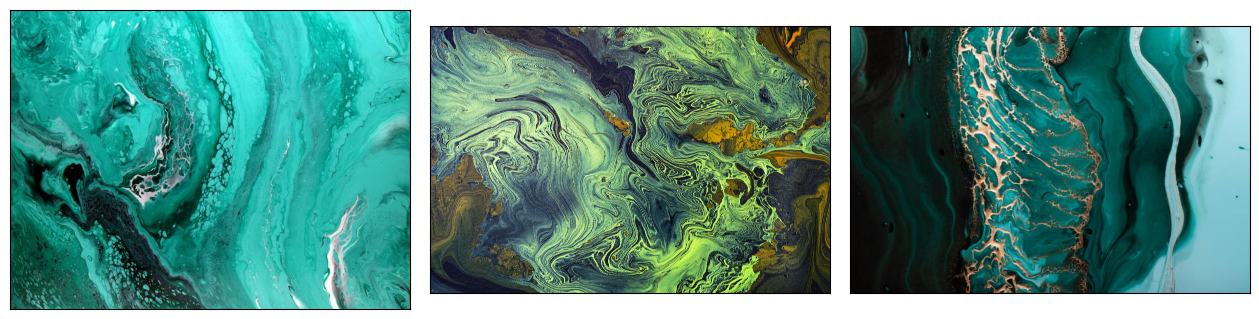

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(16, 6),
                        subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)

ax[0].imshow(images[0])
ax[1].imshow(images[1])
ax[2].imshow(images[2])

# Preprocess Images

- resize images to common size (224 x 224)
- stores processed images as numpy array for further processing (i.e. feeding to neural network for training or inference)

Why?
- consistent input size : neural networks typically expect fixed-size images to be processed uniformly (note. for CNN, size of input layer must match expected input size)
- reduced computational complexity : faster training and computation times
- feature extraction : helps in extracting meaningful features
- normalization : scale pixel values to specific range (limit computational resources for large datasets)
- memory efficiency : smaller sizes reduce memory requirement
- data augmentation : increase diversity of data

In [65]:
processed_images = []
for img in images:
    processed_images.append(cv2.resize(img, (224, 224)))
processed_images = np.array(processed_images)

## check pre-processed images

In [66]:
for image in processed_images:
  print('Dimensions: ', image.shape)

processed_images

Dimensions:  (224, 224, 3)
Dimensions:  (224, 224, 3)
Dimensions:  (224, 224, 3)


array([[[[ 49, 134, 124],
         [ 49, 148, 133],
         [ 66, 173, 157],
         ...,
         [ 54, 209, 193],
         [ 67, 222, 206],
         [ 64, 220, 207]],

        [[ 39, 152, 138],
         [ 26, 152, 133],
         [ 18, 149, 129],
         ...,
         [ 32, 187, 173],
         [ 57, 213, 199],
         [ 64, 220, 208]],

        [[ 24, 161, 147],
         [ 29, 175, 158],
         [ 27, 173, 156],
         ...,
         [ 30, 186, 173],
         [ 41, 197, 184],
         [ 73, 229, 218]],

        ...,

        [[ 49,  92,  66],
         [ 28, 109,  92],
         [ 39, 109,  91],
         ...,
         [ 46, 151, 139],
         [ 45, 142, 131],
         [ 83, 144, 134]],

        [[ 45,  82,  58],
         [ 23,  96,  80],
         [ 10,  71,  55],
         ...,
         [  1,  96,  83],
         [ 56, 147, 139],
         [ 87, 142, 132]],

        [[ 44,  76,  53],
         [ 29,  97,  81],
         [ 13,  66,  51],
         ...,
         [ 28, 122, 110],
        

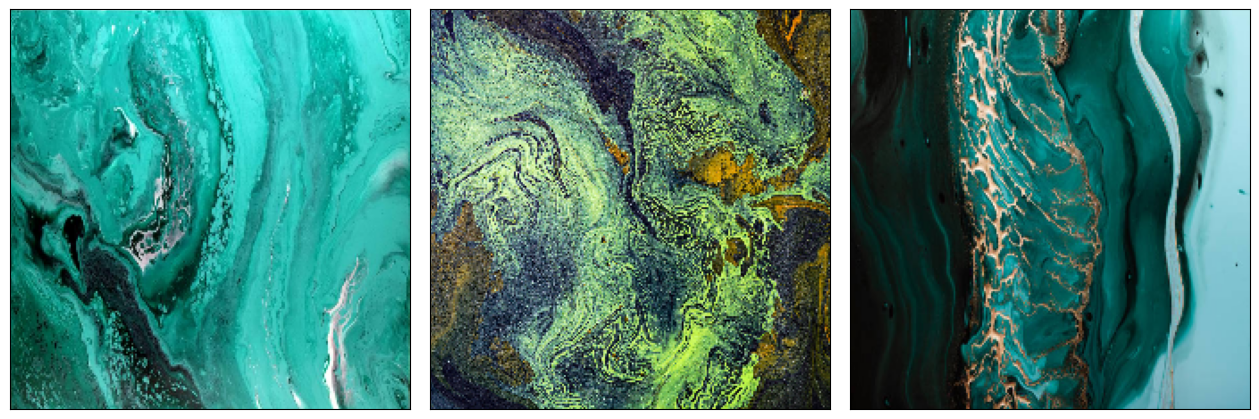

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6),
                        subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)

ax[0].imshow(processed_images[0])
ax[1].imshow(processed_images[1])
ax[2].imshow(processed_images[2])

# Define CNN Model

In [81]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(20)
])

# Extract features from images

In [82]:
features = model.predict(processed_images)

1/1 [==============================] - 0s 216ms/step


# Cluster feature vectors using K-Means

In [83]:
features

array([[ -5.5888824 ,  29.65083   ,  32.74483   ,  49.07168   ,
         28.696396  , -34.384323  ,  -1.9751339 , -36.162743  ,
         52.058193  ,  12.63425   ,  -2.6852121 ,  39.125126  ,
        -12.255157  , -16.29804   ,  31.152462  , -35.456158  ,
        -35.128372  ,  36.848507  ,  15.238916  ,  39.80707   ],
       [  3.3457875 ,  18.544802  ,  14.007603  ,  46.006207  ,
         24.211021  , -22.105085  ,   5.370511  , -23.61154   ,
         60.551697  ,   9.4236355 ,  11.799283  ,  55.96656   ,
        -26.074387  , -20.92037   ,  33.13263   , -32.287064  ,
        -39.806366  ,  20.229748  ,   0.68076706,  36.842857  ],
       [ -4.3652186 ,   8.036833  ,  27.745413  ,  32.297108  ,
          6.964203  , -10.275262  ,  -3.9765873 , -10.545517  ,
         36.898773  ,   9.1378    ,   0.29573894,  26.914633  ,
          2.1246572 ,   4.6308384 ,  16.50741   , -22.723911  ,
        -26.131561  ,  28.320826  ,  22.228807  ,  34.198387  ]],
      dtype=float32)

In [84]:
n_clusters = min(20, features.shape[0])
kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

# Get cluster centers as color palette

In [72]:
#prevalent_colors = kmeans.cluster_centers_.astype(int)

In [89]:
kmeans.cluster_centers_

array([[ -5.5888824 ,  29.65083   ,  32.74483   ,  49.07168   ,
         28.696396  , -34.384323  ,  -1.9751339 , -36.162743  ,
         52.058193  ,  12.63425   ,  -2.6852121 ,  39.125126  ,
        -12.255157  , -16.29804   ,  31.152462  , -35.456158  ,
        -35.128372  ,  36.848507  ,  15.238916  ,  39.80707   ],
       [ -4.3652186 ,   8.036833  ,  27.745413  ,  32.297108  ,
          6.964203  , -10.275262  ,  -3.9765873 , -10.545517  ,
         36.898773  ,   9.1378    ,   0.29573894,  26.914633  ,
          2.1246576 ,   4.6308384 ,  16.50741   , -22.723911  ,
        -26.131561  ,  28.320826  ,  22.228807  ,  34.198387  ],
       [  3.3457875 ,  18.544802  ,  14.007603  ,  46.006207  ,
         24.211021  , -22.105085  ,   5.370511  , -23.61154   ,
         60.551697  ,   9.4236355 ,  11.799283  ,  55.96656   ,
        -26.074387  , -20.92037   ,  33.13263   , -32.287064  ,
        -39.806366  ,  20.229748  ,   0.68076706,  36.842857  ]],
      dtype=float32)

In [85]:
prevalent_colors = kmeans.cluster_centers_.astype(int).tolist()

In [86]:
prevalent_colors

[[-5,
  29,
  32,
  49,
  28,
  -34,
  -1,
  -36,
  52,
  12,
  -2,
  39,
  -12,
  -16,
  31,
  -35,
  -35,
  36,
  15,
  39],
 [-4,
  8,
  27,
  32,
  6,
  -10,
  -3,
  -10,
  36,
  9,
  0,
  26,
  2,
  4,
  16,
  -22,
  -26,
  28,
  22,
  34],
 [3,
  18,
  14,
  46,
  24,
  -22,
  5,
  -23,
  60,
  9,
  11,
  55,
  -26,
  -20,
  33,
  -32,
  -39,
  20,
  0,
  36]]

# Display Palette

In [75]:
import seaborn as sns
import colorsys

In [87]:
palette = prevalent_colors
palette.sort(key=lambda rgb: (lambda r, g, b : colorsys.rgb_to_hsv(r, g, b))(*rgb))

TypeError: ignored

In [77]:
palette

[[-9, -5, -32], [-35, -7, -42], [-35, -6, -33]]

In [78]:
import plotly.express as px

In [79]:
img_rgb = np.array([palette], dtype=np.uint8)
fig = px.imshow(img_rgb)

fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

In [80]:
""" TEST CODE
num_colors = 10
palette = np.zeros((50, num_colors * 50, 3), dtype=np.uint8)
start = 0

for color in prevalent_colors:
    end = start + 50
    color = np.reshape(color, (1, 1, 3))
    color = np.repeat(color, 50, axis=0)
    color = np.repeat(color, 50, axis=1)
    palette[:, start:end, :] = color
    start = end

plt.imshow(palette)
plt.axis('off')
plt.show()
"""

" TEST CODE\nnum_colors = 10\npalette = np.zeros((50, num_colors * 50, 3), dtype=np.uint8)\nstart = 0\n\nfor color in prevalent_colors:\n    end = start + 50\n    color = np.reshape(color, (1, 1, 3))\n    color = np.repeat(color, 50, axis=0)\n    color = np.repeat(color, 50, axis=1)\n    palette[:, start:end, :] = color\n    start = end\n\nplt.imshow(palette)\nplt.axis('off')\nplt.show()\n"